## Assignment 1

`About:`   
The dataset provided for this project is focused on heart failure, a critical medical condition characterized by
the heart's inability to pump blood effectively, leading to inadequate circulation throughout the body. Here's an
overview of the dataset:

`Title: Heart Failure Clinical Records Dataset:`   
Source: The dataset was collected at the Faisalabad Institute of Cardiology and the Allied Hospital in
Faisalabad, Punjab, Pakistan, during the period of April to December in 2015. It was later made available on
Kaggle.


`Description:`  
 The dataset comprises medical records of 299 patients diagnosed with heart failure. These records
include various clinical, body, and lifestyle information of the patients. The dataset encompasses 13 features,
providing insights into the patients' health status and potential risk factors for heart failure.

`Features: `  
Age: The age of the patient (numeric).

Anaemia: Indicates the presence of anemia (binary: 0 for no, 1 for yes).

Creatinine Phosphokinase (CPK): Level of creatinine phosphokinase enzyme in the blood (numeric).

Diabetes: Indicates whether the patient has diabetes (binary: 0 for no, 1 for yes).

Ejection Fraction: Percentage of blood leaving the heart at each contraction (numeric).

High Blood Pressure: Indicates whether the patient has high blood pressure (binary: 0 for no, 1 for yes).

Platelets: Platelet count in the blood (numeric).

Serum Creatinine: Level of creatinine in the blood (numeric).

Serum Sodium: Level of sodium in the blood (numeric).

Sex: Gender of the patient (binary: 0 for female, 1 for male).

Smoking: Indicates whether the patient smokes (binary: 0 for no, 1 for yes).

Time: Follow-up period (in days) for the patient's condition (numeric).

`Death Event:`   
Indicates whether the patient died during the follow-up period (binary: 0 for no, 1 for yes).

Q1. What is the distribution of age among heart failure patients in the dataset?  
Q2. How does the death rate vary with age?  
Q3. What is the percentage of male and female patients in the dataset?  
Q4. How does the platelet count vary among different age groups?  
Q5. Is there a correlation between creatinine and sodium levels in the blood?  
Q6. How does the prevalence of high blood pressure differ between male and female patients?  
Q7. What is the relationship between smoking habits and the occurrence of heart failure?  
Q8. Are there any noticeable patterns in the distribution of death events across different age groups?  
Q9. Is there any significant difference in infection/retention between patients with and without diabetes?    
Q10. How does the serum creatinine level vary between patients who survived and those who did not?  


In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

In [67]:
#read dataset 
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# 1. Distribution of Age among Heart Failure Patients

c:\Users\priyanshu kasaudhan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


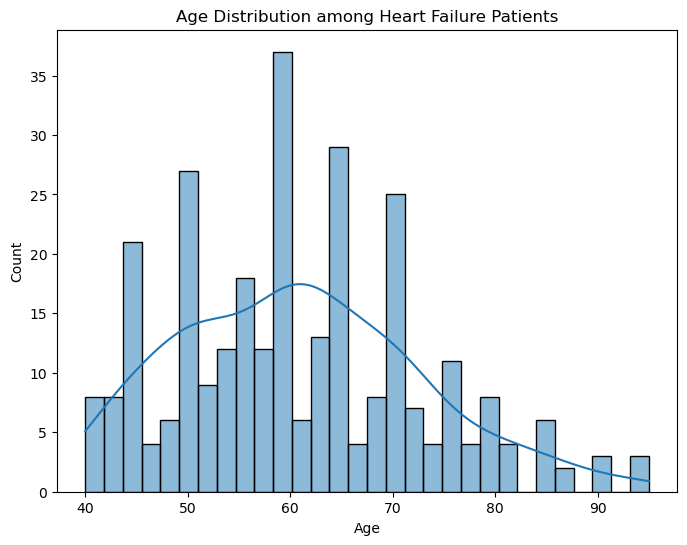

In [68]:
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution among Heart Failure Patients')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# 2. Death Rate Variation with Age

C:\Users\priyanshu kasaudhan\AppData\Local\Temp\ipykernel_3000\3850755070.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  death_rate_by_age = df.groupby('age_group')['DEATH_EVENT'].mean()


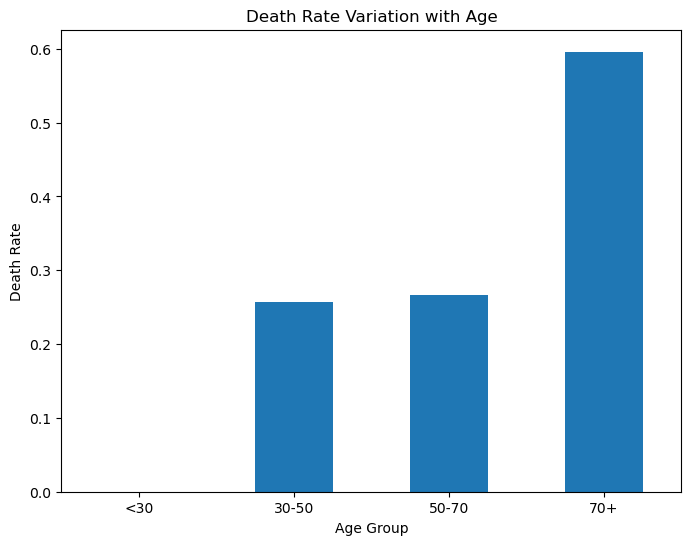

In [69]:
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 50, 70, 100], labels=['<30', '30-50', '50-70', '70+'])
death_rate_by_age = df.groupby('age_group')['DEATH_EVENT'].mean()
plt.figure(figsize=(8, 6))
death_rate_by_age.plot(kind='bar')
plt.title('Death Rate Variation with Age')
plt.xlabel('Age Group')
plt.ylabel('Death Rate')
plt.xticks(rotation=0)
plt.show()

# 3. Percentage of Male and Female Patients

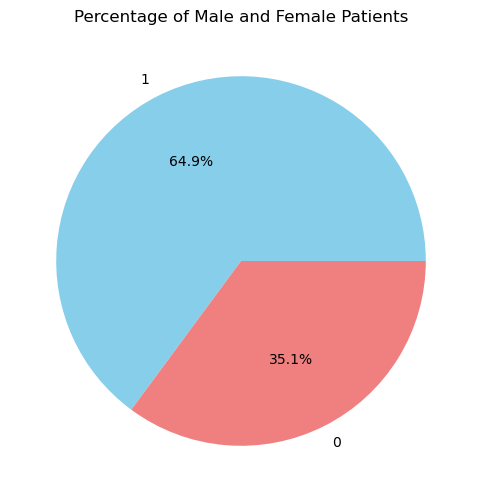

In [71]:
gender_percentage = df['sex'].value_counts(normalize=True) * 100
plt.figure(figsize=(6, 6))
gender_percentage.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Percentage of Male and Female Patients')
plt.ylabel('')
plt.show()

# 4. Platelet Count Variation among Age Groups

c:\Users\priyanshu kasaudhan\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


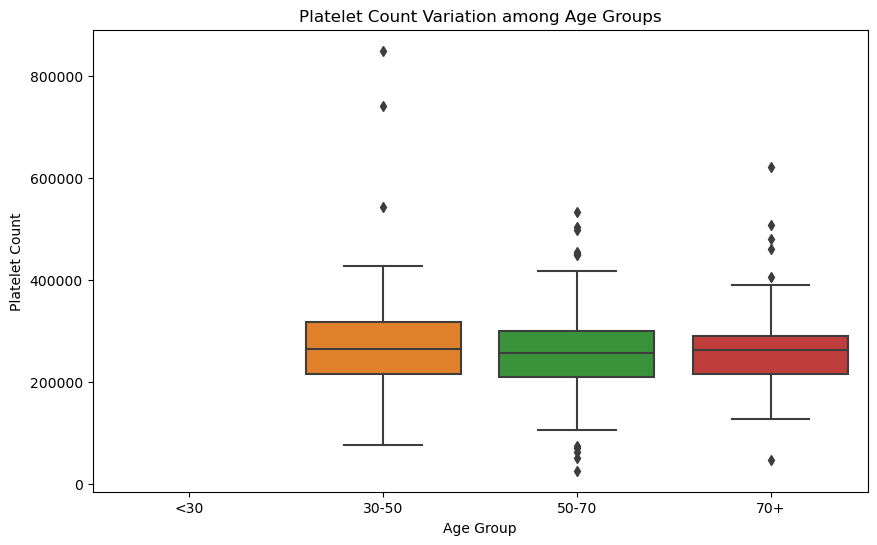

In [72]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='age_group', y='platelets')
plt.title('Platelet Count Variation among Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Platelet Count')
plt.show()

# 5. Correlation between Creatinine and Sodium Levels

In [73]:
correlation = df[['serum_creatinine', 'serum_sodium']].corr().iloc[0, 1]
print(f'Correlation between Creatinine and Sodium Levels: {correlation}')

Correlation between Creatinine and Sodium Levels: -0.18909521009117405


# 6. Prevalence of High Blood Pressure by Gender

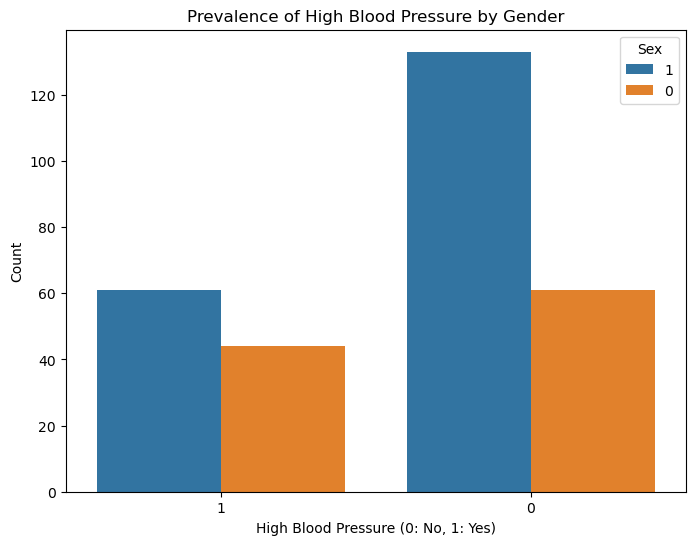

In [74]:
df['high_blood_pressure'] = df['high_blood_pressure'].astype(str)
df['sex'] = df['sex'].astype(str)

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='high_blood_pressure', hue='sex')
plt.title('Prevalence of High Blood Pressure by Gender')
plt.xlabel('High Blood Pressure (0: No, 1: Yes)')
plt.ylabel('Count')
plt.legend(title='Sex', loc='upper right')
plt.show()


# 7. Relationship between Smoking and Heart Failure Occurrence

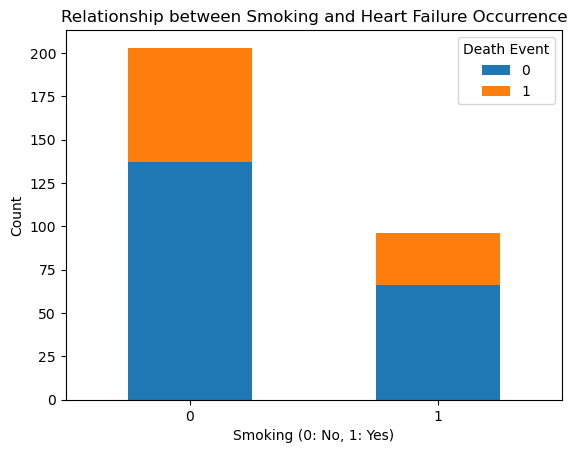

In [75]:
smoking_vs_death = pd.crosstab(df['smoking'], df['DEATH_EVENT'])
smoking_vs_death.plot(kind='bar', stacked=True)
plt.title('Relationship between Smoking and Heart Failure Occurrence')
plt.xlabel('Smoking (0: No, 1: Yes)')
plt.ylabel('Count')
plt.legend(title='Death Event', loc='upper right')
plt.xticks(rotation=0)
plt.show()

# 8. Patterns in Death Events across Age Groups

c:\Users\priyanshu kasaudhan\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


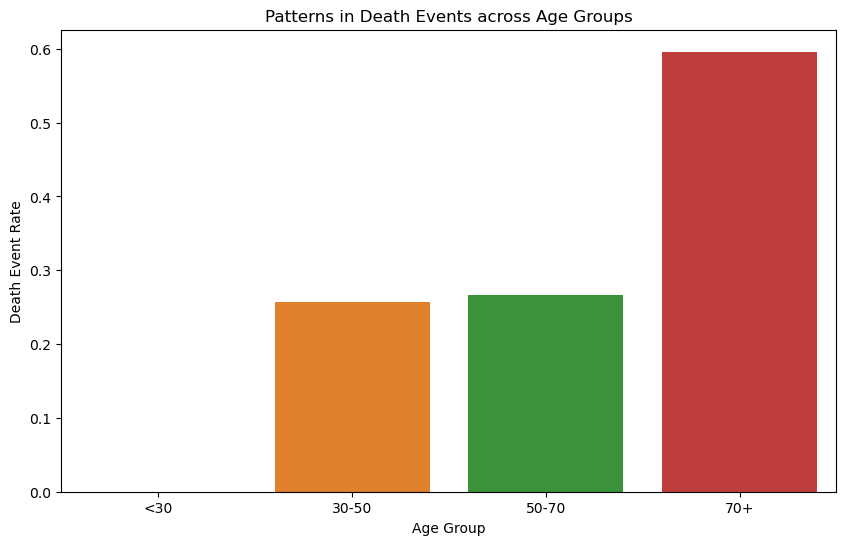

In [76]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='age_group', y='DEATH_EVENT', errorbar=None, errcolor='black', errwidth=1.5, capsize=0.1)
plt.title('Patterns in Death Events across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Death Event Rate')
plt.show()

# 9. Difference in Infection/Retention with Diabetes Status

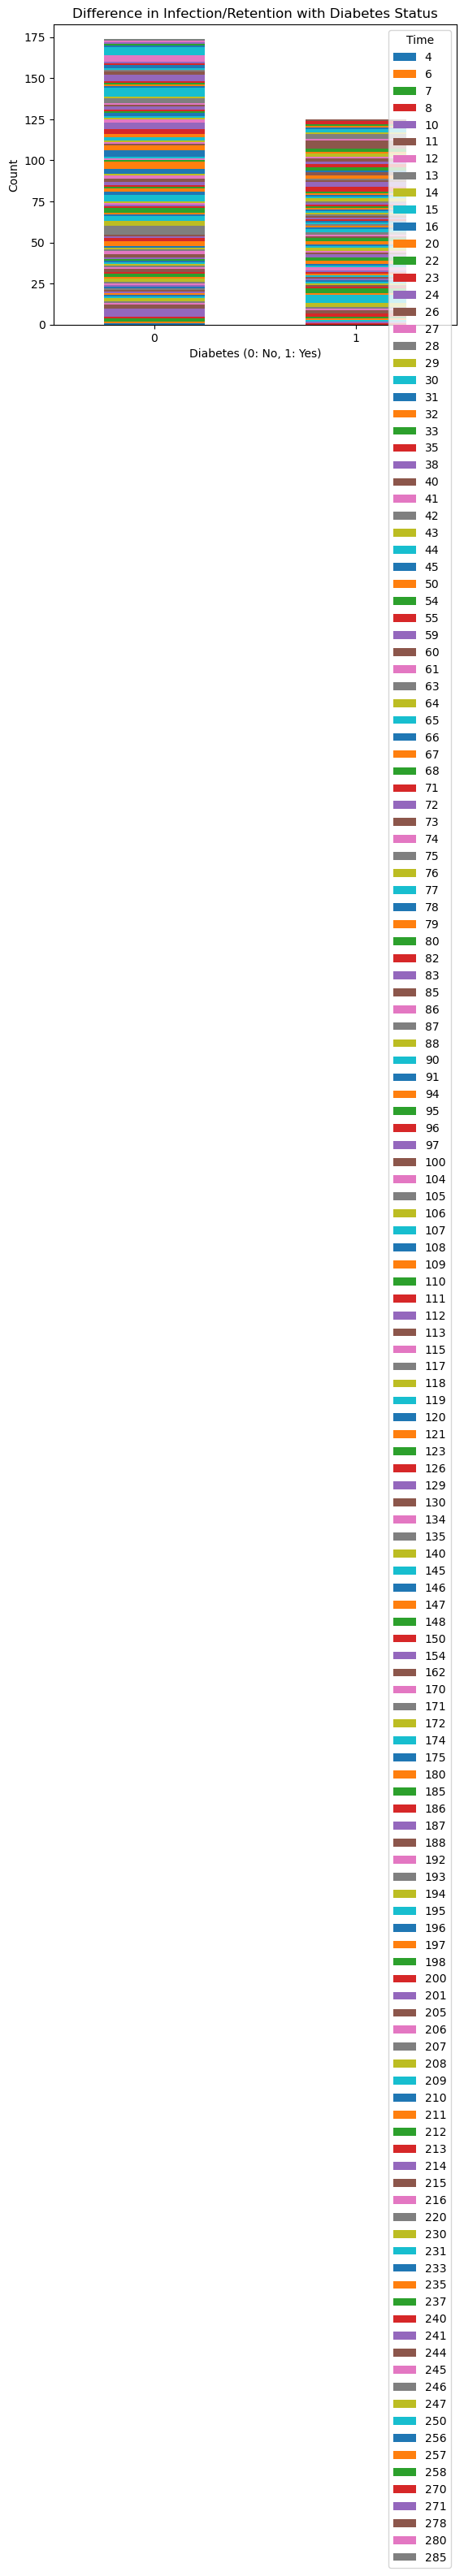

In [77]:
diabetes_vs_infection = pd.crosstab(df['diabetes'], df['time'])
diabetes_vs_infection.plot(kind='bar', stacked=True)
plt.title('Difference in Infection/Retention with Diabetes Status')
plt.xlabel('Diabetes (0: No, 1: Yes)')
plt.ylabel('Count')
plt.legend(title='Time', loc='upper right')
plt.xticks(rotation=0)
plt.show()

# 10. Variation in Serum Creatinine Level between Survivors and Non-survivors

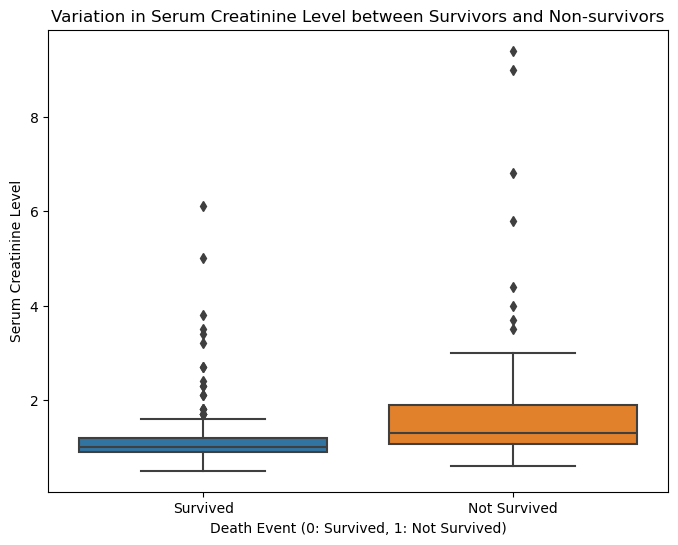

In [78]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='DEATH_EVENT', y='serum_creatinine')
plt.title('Variation in Serum Creatinine Level between Survivors and Non-survivors')
plt.xlabel('Death Event (0: Survived, 1: Not Survived)')
plt.ylabel('Serum Creatinine Level')
plt.xticks(ticks=[0, 1], labels=['Survived', 'Not Survived'])
plt.show()